In [2]:
install.packages("readxl")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library("readxl")

In [4]:
library(twitteR)
library(tm)
library(wordcloud)
library(RColorBrewer)
library(data.table)
setup_twitter_oauth("klxgbhkXthwJnyaZkEGhCjkzc","QlDgLS9lZGDu4pmzeedbVsM7yq4SGJMuTg43kqKCwmkcgfmj91","772501946771070976-Jn3eTgPox3BT5AO2JSPhijJT9JRYPaH","17g643pjFbGeH0JIY1Gl9FalHL3K4KtnRbqLljAYc1GDd")

Loading required package: NLP
Loading required package: RColorBrewer


[1] "Using direct authentication"


In [5]:
tweets<-searchTwitter("#uspolitics",5000,lang="en")

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
“5000 tweets were requested but the API can only return 2988”

In [6]:
tweets

[[1]]
[1] "ShayneOfficial: RT @anthonyfalls: Only in America is this considered a tight race.... #GA06 #USPolitics https://t.co/9CNAXY8OUv"

[[2]]
[1] "danieldepe: RT @anthonyfalls: Only in America is this considered a tight race.... #GA06 #USPolitics https://t.co/9CNAXY8OUv"

[[3]]
[1] "murdochdavis: Shhh don't anyone tell him that going to a runoff isn't a win... #Trump #USPolitics #georgia https://t.co/0dZWIzQpdG"

[[4]]
[1] "diypotus: How a community changed by refugees came to embrace Trump - https://t.co/3vLj8ipJeO - #USPolitics #trump #potus"

[[5]]
[1] "AskAlexRowan: Brilliant and succinct article elucidating voting. #Auspol #UKPolitics #USPolitics https://t.co/tc1jdW653T"

[[6]]
[1] "JSWTurnbull: 4 tweets and a robo-call from #Trump in the Georgia election\n\nDesperate political interference?\n\n#USPolitics #CNN\n\nhttps://t.co/k18rasYMBa"

[[7]]
[1] "RyanWesterson: Don't you have something else to be worried about?? #USPolitics https://t.co/yqPKPTPu0T"

[[8]]
[1] "preps285: R

In [7]:
tweets=strip_retweets(tweets)

In [8]:
tweets

[[1]]
[1] "murdochdavis: Shhh don't anyone tell him that going to a runoff isn't a win... #Trump #USPolitics #georgia https://t.co/0dZWIzQpdG"

[[2]]
[1] "diypotus: How a community changed by refugees came to embrace Trump - https://t.co/3vLj8ipJeO - #USPolitics #trump #potus"

[[3]]
[1] "AskAlexRowan: Brilliant and succinct article elucidating voting. #Auspol #UKPolitics #USPolitics https://t.co/tc1jdW653T"

[[4]]
[1] "JSWTurnbull: 4 tweets and a robo-call from #Trump in the Georgia election\n\nDesperate political interference?\n\n#USPolitics #CNN\n\nhttps://t.co/k18rasYMBa"

[[5]]
[1] "RyanWesterson: Don't you have something else to be worried about?? #USPolitics https://t.co/yqPKPTPu0T"

[[6]]
[1] "belle_province: So @realDonaldTrump congratulated Erdogan for 'winning' a referendum on  'reforms' which turn Turkey into a dictatorship. Wow. #USPolitics"

[[7]]
[1] "NoThiefs: U.S. Deported Immigrant in ‘Dreamer’ Program, Lawsuit Says https://t.co/uU5n58QXCj #USPolitics via nytimes http

In [15]:
tweet_text=sapply(tweets, function(x) x$getText())

In [16]:
head(tweet_text)

[1] "Shhh don't anyone tell him that going to a runoff isn't a win... #Trump #USPolitics #georgia https://t.co/0dZWIzQpdG"                            
[2] "How a community changed by refugees came to embrace Trump - https://t.co/3vLj8ipJeO - #USPolitics #trump #potus"                                 
[3] "Brilliant and succinct article elucidating voting. #Auspol #UKPolitics #USPolitics https://t.co/tc1jdW653T"                                      
[4] "4 tweets and a robo-call from #Trump in the Georgia election\n\nDesperate political interference?\n\n#USPolitics #CNN\n\nhttps://t.co/k18rasYMBa"
[5] "Don't you have something else to be worried about?? #USPolitics https://t.co/yqPKPTPu0T"                                                         
[6] "So @realDonaldTrump congratulated Erdogan for 'winning' a referendum on  'reforms' which turn Turkey into a dictatorship. Wow. #USPolitics"

In [17]:
tweet_text=gsub("rt", "", tweet_text) # remove Retweet
tweet_text = gsub("@\\w+", "", tweet_text) # remove at(@)
tweet_text= gsub("[[:punct:]]", "", tweet_text) # remove punctuation
tweet_text = gsub("[[:digit:]]", "", tweet_text) # remove numbers/Digits
tweet_text = gsub("http\\w+", "", tweet_text)  # remove links http
tweet_text = gsub("[ |\t]{2,}", "", tweet_text) # remove tabs
tweet_text= gsub("^ ", "", tweet_text)  # remove blank spaces at the beginning
tweet_text= gsub(" $", "", tweet_text) # remove blank spaces at the end
tweet_text=gsub('\\p{So}|\\p{Cn}', '', tweet_text, perl = TRUE)
tweet_text=gsub("[^0-9A-Za-z///' ]", "", tweet_text)


In [18]:
tweet_text

[1] "Shhh dont anyone tell him that going to a runoff isnt a win Trump USPolitics georgia"                                                     
   [2] "How a community changed by refugees came to embrace TrumpUSPolitics trump potus"                                                          
   [3] "Brilliant and succinct aicle elucidating voting Auspol UKPolitics USPolitics"                                                             
   [4] "tweets and a robocall from Trump in the Georgia electionDesperate political interferenceUSPolitics CNN"                                   
   [5] "Dont you have something else to be worried about USPolitics"                                                                              
   [6] "Socongratulated Erdogan for winning a referendum onreforms which turn Turkey into a dictatorship Wow USPolitics"                          
   [7] "US Depoed Immigrant in Dreamer Program Lawsuit SaysUSPolitics via nytimesnothie"                                                          
   [8] "Iran nuclear deal Trump administration says Tehran complying with agreementUSPolitics trump potus"                                        
   [9] "Georgias Sixth Congressional District Check this out Amazing Democrats USPolitics SuckItTrump"                                            
  [10] "Isnt Trump just the ArchieBunker of the stCenturyviauspolitics uspoli auspol culture politics"                                            
  [11] "GA Spot a Reptilian Fast Dont let the politricks fool youuspolitics"                                                                      
  [12] "Trump administration says Iran complying with nuclear dealUSPolitics trump potus"                                                         
  [13] "Interesting piece on how USPolitics could be well served by going more local somethinghas long understood"                                
  [14] "Retweeted Anthony Falls Only in America is this considered a tight race GA USPolitics"                                                    
  [15] "Only in America is this considered a tight race GA USPolitics"                                                                            
  [16] "DHS chief tells Congress critics to shut up or change immigration lawsUSPolitics trump potus"                                             
  [17] "First Dog on the Moons guide to preparing for nuclear war Are you ready auspol USPolitics"                                                
  [18] "Come on morons eliminate yourselves The rest of us cannot waitPaul Craig Robes speaks out USpolitics"                                     
  [19] "Hand of US Leaves Noh Koreas Missile Program ShakenUSPolitics via nytimesnothiefs"                                                        
  [20] "Oh Disappointed Thought you were having a fun lunchtime USpolitics is flagellism"                                                         
  [21] "As Trump warned Noh Korea his armada was headed toward AustraliaUSPolitics trump potus"                                                   
  [22] "The latest The Fed Up ExFed Daily BullsheetThanks touspolitics"                                                                           
  [23] "DuchessFrida The global situation far too much politics ampamp not enough good governance Yesauspol USPolitics Brexit"                    
  [24] "Professor who tweeted Trump must hang goes on leave for semesterUSPolitics trump potus"                                                   
  [25] "The global situation far too much politics amp not enough good governance Yesauspol USPolitics Brexit"                                    
  [26] "Even the Easter Bunny was corporatised under TrumpviaUSPolitics "                                                                         
  [27] "No wayI dont want your American ghetto milk Wisconsin USPolitics uspoli canpoli"                                                          
  [28] "Not just UKpolitics but US

In [19]:
tweets_corpus <- Corpus(VectorSource(tweet_text))

In [21]:
tweets_corpus <- tm_map(tweets_corpus, function(x)removeWords(x,stopwords()))

In [26]:
inspect(tweets_corpus)[1:1000]

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 2246

   [1] Shhh dont anyone tell   going   runoff isnt  win Trump USPolitics georgia                                                   
   [2] How  community changed  refugees came  embrace TrumpUSPolitics trump potus                                                  
   [3] Brilliant  succinct aicle elucidating voting Auspol UKPolitics USPolitics                                                   
   [4] tweets   robocall  Trump   Georgia electionDesperate political interferenceUSPolitics CNN                                   
   [5] Dont   something else   worried  USPolitics                                                                                 
   [6] Socongratulated Erdogan  winning  referendum onreforms  turn Turkey   dictatorship Wow USPolitics                           
   [7] US Depoed Immigrant  Dreamer Program Lawsuit SaysUSPolitics via nytimesnothie                     

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1000

In [37]:
df_tweets=data.frame(text = sapply(tweets_corpus, as.character), stringsAsFactors = FALSE)


In [38]:
df_tweets

text
Shhh dont anyone tell going runoff isnt win Trump USPolitics georgia
How community changed refugees came embrace TrumpUSPolitics trump potus
Brilliant succinct aicle elucidating voting Auspol UKPolitics USPolitics
tweets robocall Trump Georgia electionDesperate political interferenceUSPolitics CNN
Dont something else worried USPolitics
Socongratulated Erdogan winning referendum onreforms turn Turkey dictatorship Wow USPolitics
US Depoed Immigrant Dreamer Program Lawsuit SaysUSPolitics via nytimesnothie
Iran nuclear deal Trump administration says Tehran complying agreementUSPolitics trump potus
Georgias Sixth Congressional District Check Amazing Democrats USPolitics SuckItTrump
Isnt Trump just ArchieBunker stCenturyviauspolitics uspoli auspol culture politics


In [39]:
head(df_tweets)

text
Shhh dont anyone tell going runoff isnt win Trump USPolitics georgia
How community changed refugees came embrace TrumpUSPolitics trump potus
Brilliant succinct aicle elucidating voting Auspol UKPolitics USPolitics
tweets robocall Trump Georgia electionDesperate political interferenceUSPolitics CNN
Dont something else worried USPolitics
Socongratulated Erdogan winning referendum onreforms turn Turkey dictatorship Wow USPolitics


In [43]:
write.table(df_tweets, "tweets_n.txt",)

In [45]:
x<-writeLines(df_tweets$text)

Shhh dont anyone tell   going   runoff isnt  win Trump USPolitics georgia
How  community changed  refugees came  embrace TrumpUSPolitics trump potus
Brilliant  succinct aicle elucidating voting Auspol UKPolitics USPolitics
tweets   robocall  Trump   Georgia electionDesperate political interferenceUSPolitics CNN
Dont   something else   worried  USPolitics
Socongratulated Erdogan  winning  referendum onreforms  turn Turkey   dictatorship Wow USPolitics
US Depoed Immigrant  Dreamer Program Lawsuit SaysUSPolitics via nytimesnothie
Iran nuclear deal Trump administration says Tehran complying  agreementUSPolitics trump potus
Georgias Sixth Congressional District Check   Amazing Democrats USPolitics SuckItTrump
Isnt Trump just  ArchieBunker   stCenturyviauspolitics uspoli auspol culture politics
GA Spot  Reptilian Fast Dont let  politricks fool youuspolitics
Trump administration says Iran complying  nuclear dealUSPolitics trump potus
Interesting piece   USPolitics   well served  going  local 

In [47]:
fileConn<-file("output.txt")
writeLines(c("text"), fileConn)

In [5]:
df=read_excel("/home/naina/Downloads/Book1.xlsx",)

In [6]:
df

word,count
A,30
ACA,2
ACTORS,1
ADL,1
AG,2
AI,1
ALERT,1
ALL,2
ALSO,1
ALWAYS,2


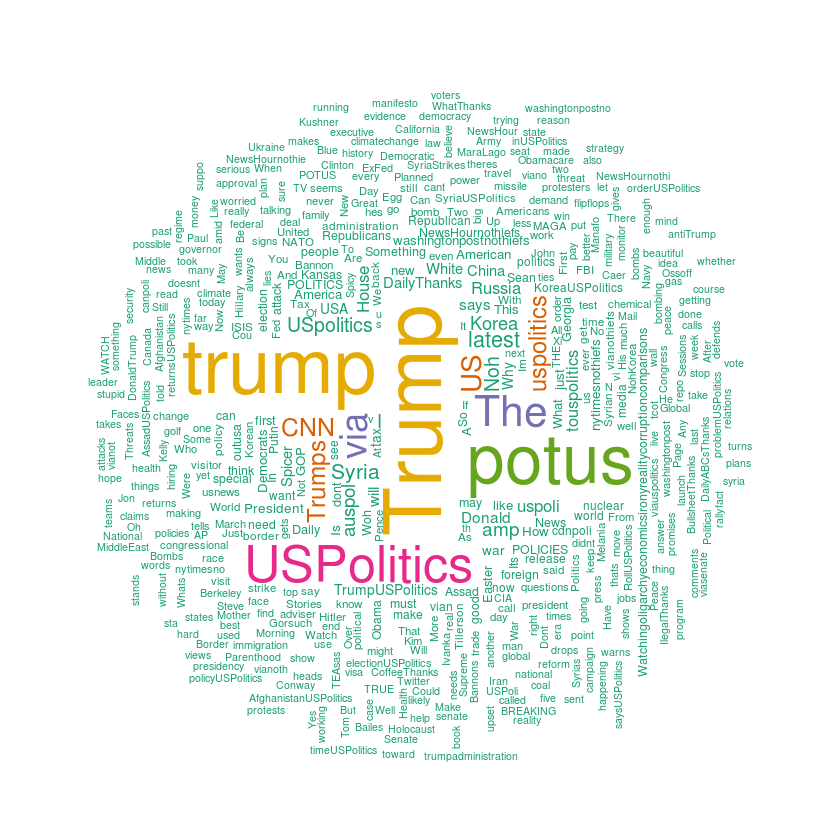

In [9]:
set.seed(1234)
wordcloud(words = df$word, freq = df$count, min.freq = 1,
          max.words=500, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(6, "Dark2"))